# <p style='font-family: https://fonts.google.com/share?selection.family=Signika+Negative:wght@300..700; background-color:#D1C4E9; font-weight:bold; color:#673AB7; border:4px solid #673AB7; border-radius:12px; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.2); padding:10px; text-align:center; transition: all 0.3s ease;'>👤 Unsupervised Fraud Detection : Graph Analysis 😈</p>

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
# LOAD DATA
devices = pd.read_csv(r'C:\Python Data Analysis\Fraud Detection\data\data\devices.csv')
credit_cards = pd.read_csv(r'C:\Python Data Analysis\Fraud Detection\data\data\credit_cards.csv')
bank_accounts = pd.read_csv(r'C:\Python Data Analysis\Fraud Detection\data\data\bank_accounts.csv')
transactions = pd.read_csv(r'C:\Python Data Analysis\Fraud Detection\data\data\transactions.csv')

transactions

C:\Users\aliff\AppData\Local\Temp\ipykernel_15548\3392142081.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  bank_accounts = pd.read_csv(r'C:\Python Data Analysis\Fraud Detection\data\data\bank_accounts.csv')


,transid,org_user_id,dest_user_id,amount
0,1953278092,C47388162,C20822974,99094
1,1953295120,C26855196,C16416890,52714
2,1953306402,C121296714,C28477978,43888
3,1953314712,C131221930,C72837912,45771
4,1953381964,C183398314,C28423332,96840
...,...,...,...,...
620942,1956636054,C14222102,C70940136,54658
620943,1956642760,C2978154,C60766142,26739
620944,1956651496,C221974772,C15541938,42036
620945,1956660812,C152533590,C80986700,66580


In [3]:
# BUILD GRAPH

G = nx.DiGraph()

# ADD EDGE org_user_id --> dest_user_id dan weight = transaction['amount']
for _, row in transactions.iterrows():
    G.add_edge(row['org_user_id'], row['dest_user_id'], weight = row['amount'])


print(f'Number of Node : {G.number_of_nodes()}')
print(f'Number of Edge : {G.number_of_edges()}')

Number of Node : 486277
Number of Edge : 576062


In [4]:
# DISPLAY THE FIRST FIVE EDGE
list(G.edges(data = True))[:5]

[('C47388162', 'C20822974', {'weight': 99094}),
 ('C26855196', 'C16416890', {'weight': 52714}),
 ('C26855196', 'C65274666', {'weight': 80052}),
 ('C121296714', 'C28477978', {'weight': 43888}),
 ('C121296714', 'C19924282', {'weight': 54884})]

In [ ]:
# DEGREE ANALYSIS

in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

print(f'Top 10 user who Receive the most Transactions (in_degrees) : ')
display(sorted(in_degrees.items(), key = lambda x: x[1], reverse = True)[:10])

print(f'Top 10 user who Make the most Transactions (out_degrees) : ')
display(sorted(out_degrees.items(), key = lambda x: x[1], reverse = True)[:10])

Top 10 user who Receive the most Transactions (in_degrees) : 


[('C102234504', 3272),
 ('C22371544', 2461),
 ('C39287026', 1801),
 ('C7443322', 1524),
 ('C17878920', 1371),
 ('C11091848', 1270),
 ('C3317184', 1219),
 ('C137978962', 1201),
 ('C16353158', 1149),
 ('C22934804', 1059)]

Top 10 user who Make the most Transactions (out_degrees) : 


[('C187679100', 48),
 ('C35130350', 48),
 ('C93607170', 40),
 ('C62531638', 31),
 ('C63997352', 29),
 ('C87169706', 29),
 ('C181616524', 26),
 ('C18495496', 25),
 ('C9842828', 24),
 ('C117148228', 24)]

Top 10 Users who make and receive the most transactions (Active Transaction): 


[('C102234504', 0.006728689057243212),
 ('C22371544', 0.005060911910108663),
 ('C39287026', 0.0037036580049190173),
 ('C7443322', 0.0031340226538015452),
 ('C17878920', 0.0028193865212348544),
 ('C11091848', 0.002611685544834621),
 ('C3317184', 0.002506806833979057),
 ('C137978962', 0.002469790818382976),
 ('C16353158', 0.002362855662216519),
 ('C22934804', 0.002177775584236113)]

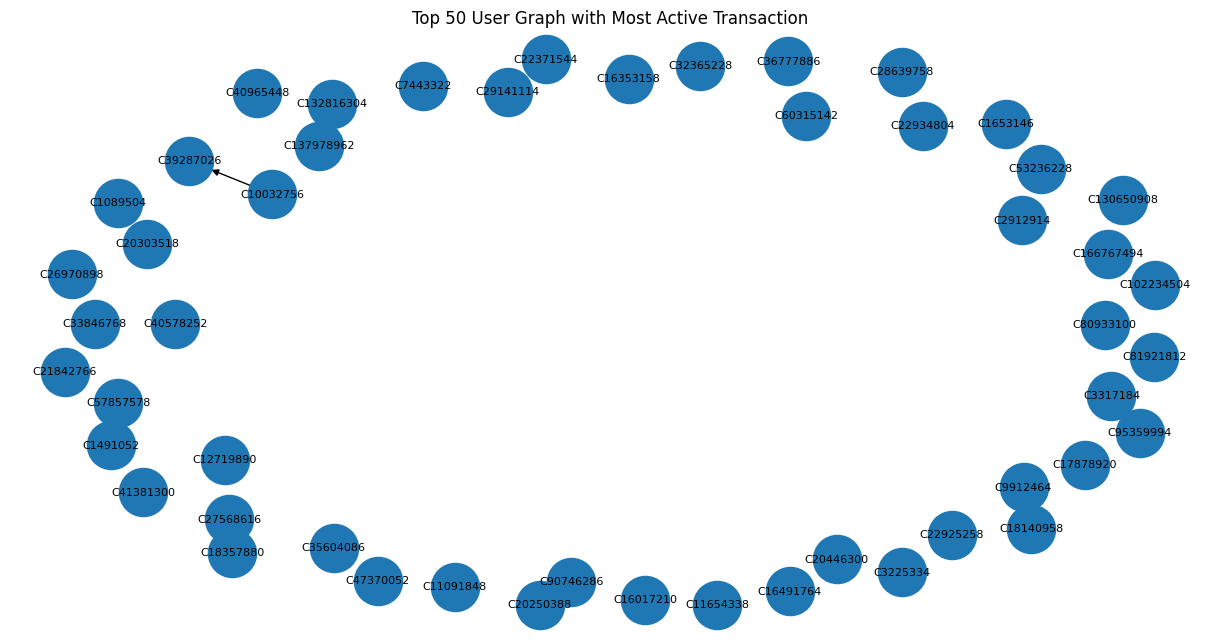

In [6]:
# DEGREE CENTRALITY

deg_centrality = nx.degree_centrality(G)

print('Top 10 Users who make and receive the most transactions (Active Transaction): ')
display(sorted(deg_centrality.items(), key = lambda x: x[1], reverse = True)[:10])


# VISUALIZE GRAPH TOP 50 MOST ACTIVE USERS
most_active_users = sorted(deg_centrality, key = deg_centrality.get, reverse = True)[:50]
subgraph = G.subgraph(most_active_users)     # --> CREATE SUBGRAPH FROM TOP 50 ACTIVE USERS

# VISUALIZE GRAPH
plt.figure(figsize = (12, 6))
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, node_size=1200, with_labels=True, font_size=8)

plt.title('Top 50 User Graph with Most Active Transaction')
plt.show()

From Top 50 user most active Transaction, Only one user among the top 50 most active users transacted with another top 50 user.

In [7]:
# CHECK CONNECTED COMPONENTS

components = list(nx.weakly_connected_components(G))
print(f'Number of Connected Components : {len(components)}')

big_components =  [c for c in components if len(c) >= 10]
print(f'Number of Connected Components : {len(big_components)}')

# TOP 10 LENGTH THE BIGGEST COMPONENT
top10_component = sorted(components, key = len, reverse = True)[:10]
top10 = [len(c) for c in top10_component]

print(f'Length of Top 10 Biggest Components : {top10}')

Number of Connected Components : 27642
Number of Connected Components : 166
Length of Top 10 Biggest Components : [415616, 105, 63, 50, 47, 44, 38, 37, 34, 30]


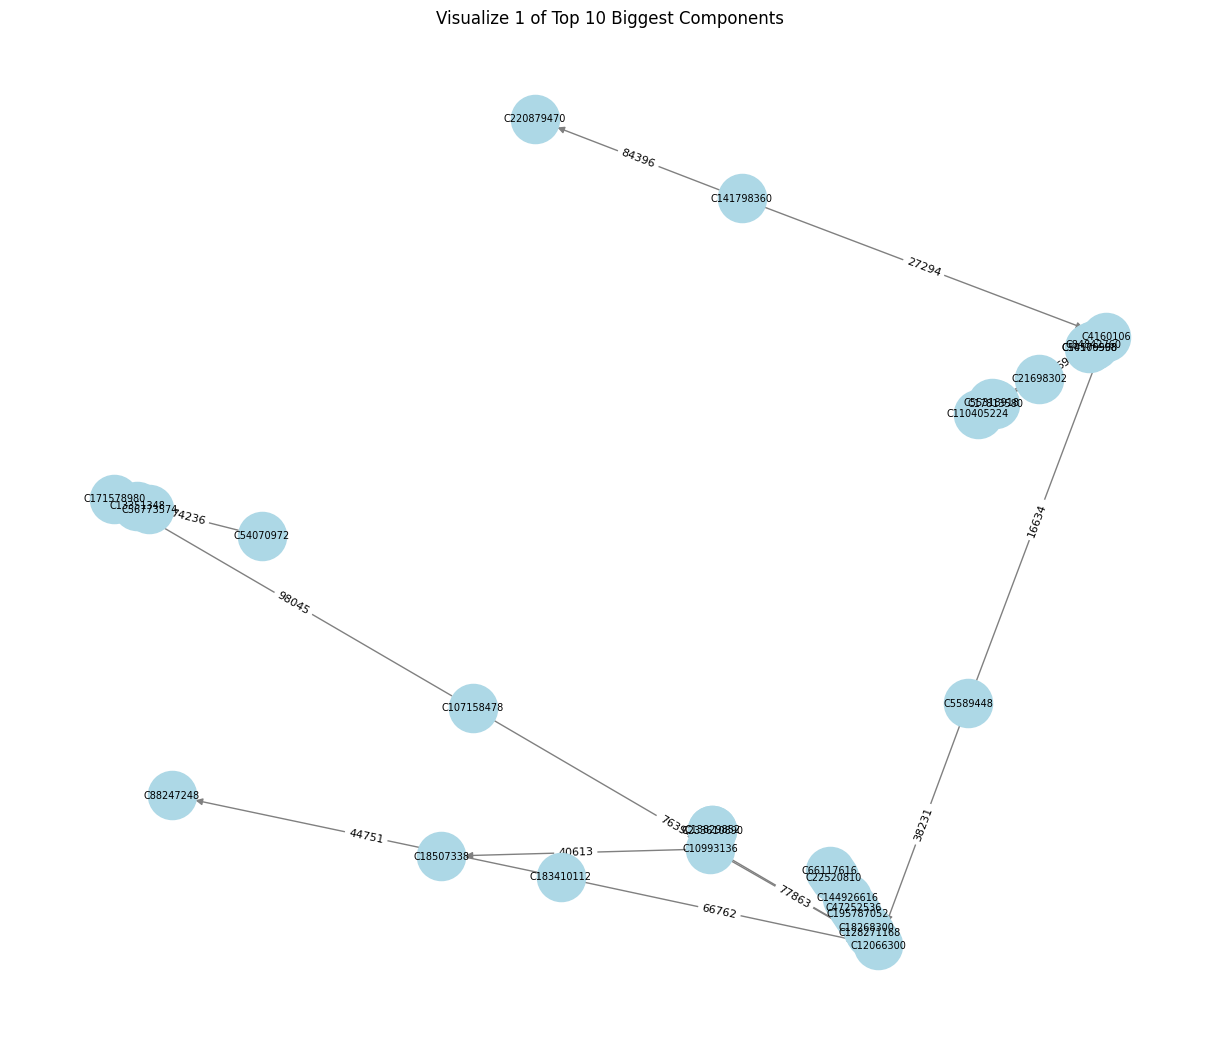

In [8]:
# VISUALIZE 1 SMALL COMPONENT

sample_component = top10_component[9]
subgraph = G.subgraph(sample_component)

plt.figure(figsize = (12, 10))

pos = nx.spring_layout(subgraph)  # --> TO IDENTIFY COORDINATE EACH NODE
nx.draw(subgraph, pos = pos, with_labels = True, node_color = 'lightblue', edge_color = 'gray', node_size = 1200, font_size = 7) # --> VISUALIZE GRAPH
nx.draw_networkx_edge_labels(subgraph, pos = pos, edge_labels = {(u, v): d['weight'] for u, v, d in subgraph.edges(data=True)}, font_size = 8)

plt.title('Visualize 1 of Top 10 Biggest Components')
plt.show()

In [9]:
# TOP SENDER AND RECEIVER ON EACH TOP 10 BIGGEST COMPONENT

for i, comp in enumerate(top10_component, start=1):
    subG = G.subgraph(comp)
    in_amounts = dict(subG.in_degree(weight='weight'))
    out_amounts = dict(subG.out_degree(weight='weight'))

    top_senders = sorted(out_amounts.items(), key=lambda x: x[1], reverse=True)[:5]
    top_receivers = sorted(in_amounts.items(), key=lambda x: x[1], reverse=True)[:5]

    print(f"\n===== Komponen #{i} (size={len(subG)} nodes) =====")

    print("Top 5 Senders (uang keluar terbesar):")
    for user, total in top_senders:
        print(f"  {user}: {total:.2f}")

    print("Top 5 Receivers (uang masuk terbesar):")
    for user, total in top_receivers:
        print(f"  {user}: {total:.2f}")


===== Komponen #1 (size=415616 nodes) =====
Top 5 Senders (uang keluar terbesar):
  C35130350: 2823750.00
  C187679100: 2507446.00
  C93607170: 2458030.00
  C62531638: 1659767.00
  C87169706: 1642985.00
Top 5 Receivers (uang masuk terbesar):
  C102234504: 180606964.00
  C22371544: 135651530.00
  C39287026: 98457409.00
  C7443322: 85418601.00
  C17878920: 76247361.00

===== Komponen #2 (size=105 nodes) =====
Top 5 Senders (uang keluar terbesar):
  C234608334: 95696.00
  C234477678: 91938.00
  C233266792: 91821.00
  C234621562: 90829.00
  C234483758: 90355.00
Top 5 Receivers (uang masuk terbesar):
  C26351380: 5756372.00
  C233070766: 0.00
  C234596042: 0.00
  C234608334: 0.00
  C234944510: 0.00

===== Komponen #3 (size=63 nodes) =====
Top 5 Senders (uang keluar terbesar):
  C233415808: 111439.00
  C198293182: 98787.00
  C220170950: 98334.00
  C192856076: 94911.00
  C210386572: 90266.00
Top 5 Receivers (uang masuk terbesar):
  C151137830: 1747556.00
  C153773242: 1430393.00
  C232824218

In [ ]:
# CHECK RATIO INFLOW AND OUTFLOW

ratio_in_out = {}

for n in G.nodes():
    in_deg = G.in_degree(n, weight='weight')
    out_deg = G.out_degree(n, weight='weight')
    ratio_in_out[n] = in_deg / (out_deg + 1e-6)  # tambahkan 1e-6 untuk hindari div by zero

# Urutkan dari node dengan rasio terbesar (banyak inflow, sedikit outflow)
suspicious_nodes = sorted(ratio_in_out.items(), key=lambda x: x[1], reverse=True)

# Tampilkan 10 teratas
for n, ratio in suspicious_nodes[:10]:
    print(f"{n}: ratio_in_out = {ratio:.2f}")

C102234504: ratio_in_out = 180606964000000.00
C22371544: ratio_in_out = 135651530000000.00
C39287026: ratio_in_out = 98457409000000.00
C7443322: ratio_in_out = 85418601000000.00
C17878920: ratio_in_out = 76247361000000.00
C11091848: ratio_in_out = 70204577000000.00
C3317184: ratio_in_out = 67937854000000.00
C137978962: ratio_in_out = 65900793000000.00
C16353158: ratio_in_out = 63381281000000.00
C22934804: ratio_in_out = 59277073000000.00


In [63]:
node = 'C102234504'
print("Inflow edges:")
print(list(G.in_edges(node, data=True)))
print("Outflow edges:")
print(list(G.out_edges(node, data=True)))

Inflow edges:
[('C23361452', 'C102234504', {'weight': 51938}), ('C152570744', 'C102234504', {'weight': 19919}), ('C39529934', 'C102234504', {'weight': 34678}), ('C204541212', 'C102234504', {'weight': 97606}), ('C7606768', 'C102234504', {'weight': 14755}), ('C23012152', 'C102234504', {'weight': 88720}), ('C77711500', 'C102234504', {'weight': 79464}), ('C124804034', 'C102234504', {'weight': 22113}), ('C58151916', 'C102234504', {'weight': 30457}), ('C91296588', 'C102234504', {'weight': 65918}), ('C47287522', 'C102234504', {'weight': 45894}), ('C121246222', 'C102234504', {'weight': 48267}), ('C56105332', 'C102234504', {'weight': 19425}), ('C16806896', 'C102234504', {'weight': 10307}), ('C61081766', 'C102234504', {'weight': 92609}), ('C214283358', 'C102234504', {'weight': 96572}), ('C72397980', 'C102234504', {'weight': 58251}), ('C208165014', 'C102234504', {'weight': 84908}), ('C31599838', 'C102234504', {'weight': 35408}), ('C156487450', 'C102234504', {'weight': 74952}), ('C164312360', 'C10

In [ ]:
# AKUN YG HANYA INFLOW , TAPI TIDAK PERNAH OUTFLOW (MENGIRIM UANG KE USER LAIN)

summary = []
for n in G.nodes():
    inflow = G.in_degree(n, weight='weight')
    outflow = G.out_degree(n, weight='weight')
    in_deg = G.in_degree(n)
    out_deg = G.out_degree(n)
    summary.append((n, inflow, outflow, in_deg, out_deg, inflow/(outflow+1e-6)))

import pandas as pd
df = pd.DataFrame(summary, columns=['Node', 'Inflow', 'Outflow', 'In_Degree', 'Out_Degree', 'In/Out_Ratio'])
df = df.sort_values(by='In/Out_Ratio', ascending=False)

# Filter node dengan inflow besar tapi outflow 0
sinks = df[(df['Outflow'] == 0) & (df['Inflow'] > 10000)]
sinks

,Node,Inflow,Outflow,In_Degree,Out_Degree,In/Out_Ratio
232,C102234504,180606964,0,3272,0,1.806070e+14
365,C22371544,135651530,0,2461,0,1.356515e+14
868,C39287026,98457409,0,1801,0,9.845741e+13
1502,C7443322,85418601,0,1524,0,8.541860e+13
287,C17878920,76247361,0,1371,0,7.624736e+13
...,...,...,...,...,...,...
31728,C17370538,10007,0,1,0,1.000700e+10
145611,C81375976,10007,0,1,0,1.000700e+10
52027,C17285174,10006,0,1,0,1.000600e+10
264731,C51455288,10002,0,1,0,1.000200e+10


Number of Cycles Transaction Detected : 22


[['C161089746', 'C55504988'],
 ['C53758750', 'C101619778'],
 ['C18016048', 'C41132868'],
 ['C11870700', 'C9061644'],
 ['C10595608', 'C158045596'],
 ['C79625830', 'C82976074'],
 ['C163260544', 'C24392848'],
 ['C42062788', 'C197254380'],
 ['C1412592', 'C70551126'],
 ['C134533348', 'C6774336'],
 ['C120189934', 'C124193050'],
 ['C144394044', 'C65466516'],
 ['C66207098', 'C20044624'],
 ['C174221764', 'C60937930'],
 ['C31398560', 'C96879014'],
 ['C16856458', 'C50916742'],
 ['C69046994', 'C63437634'],
 ['C27897426', 'C174993608'],
 ['C32417068', 'C93484310'],
 ['C224296274', 'C193350172'],
 ['C177526500', 'C41894952'],
 ['C39975130', 'C107195354']]

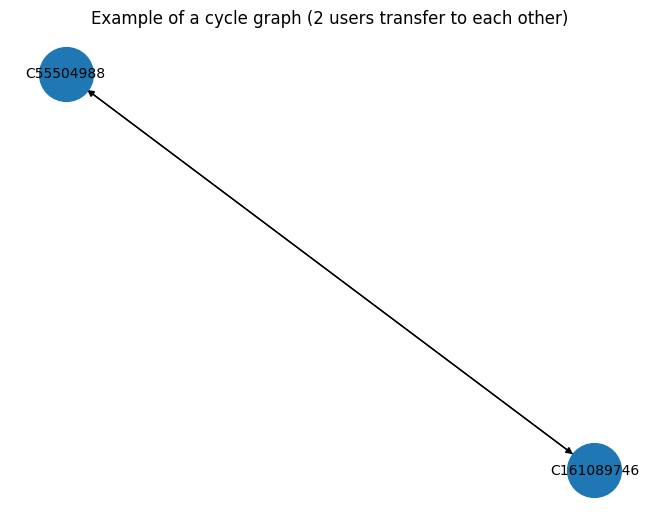

In [ ]:
# FIND TRANSACTION CYCLE

cycles = list(nx.simple_cycles(G))
print(f'Number of Cycles Transaction Detected : {len(cycles)}')
if cycles:
    display(cycles)


# VISUALIZE 1 CYCLE EXAMPLE
for i, cycle in enumerate(cycles):
    sub_cycle = G.subgraph(cycle)
    nx.draw(sub_cycle, with_labels = True, node_size = 1500, font_size = 10)
    
    plt.title('Example of a cycle graph (2 users transfer to each other)')
    plt.show()
    break

In [51]:
# CLOSENESS CENTRALITY

'''Closeness centrality mengukur seberapa dekat sebuah node ke semua node lain di dalam jaringan.
Makin tinggi nilainya → makin cepat dia bisa “menjangkau” semua orang lain lewat jalur transaksi.'''

close_centrality = nx.closeness_centrality(G)

print('Top 10 Closeness Centrality Node :')
sorted(close_centrality.items(), key = lambda x : x[1], reverse = True)[:10]

Top 10 Closeness Centrality Node :


[('C39287026', 0.036565891262248025),
 ('C102234504', 0.006694128199797463),
 ('C22371544', 0.005080080918185205),
 ('C7443322', 0.003134213951039767),
 ('C17878920', 0.002821765657207058),
 ('C137978962', 0.002616768651401246),
 ('C11091848', 0.0026118148709760665),
 ('C3317184', 0.0025029358780997283),
 ('C16353158', 0.002394210175050317),
 ('C22934804', 0.0021815561561543146)]

In [ ]:
# BETWENESS CENTRALITY

#between_centrality = nx.betweenness_centrality(G)

#between_centrality

In [10]:
# CHECK SHARED DEVICES TO MANY USER

device_to_users = defaultdict(set)

# ADD EACH SAMPLE TO THE DICT-SET
for _, row in devices.iterrows():
    device_to_users[row['device']].add(row['user_id'])

# GET DEVICES WHO SHARED MORE THAN 1 USERS
shared_devices = {device : user for device, user in device_to_users.items() if len(user) > 1}
print(f'\033[1mNumber of device used by more than 1 devices : {len(shared_devices)}\033[0m\n')

# DISPLAY TOP 10 DEVICES THAT MOST USED BY USER
top_shared_devices = sorted(shared_devices.items(), key = lambda x : len(x[1]), reverse = True)
top_10_shared_devices = top_shared_devices[:10]

for device, user in top_10_shared_devices:
    print(f'Devices : {device}, Used by {len(user)} Different User')
    print(f'User : {user}')

Number of device used by more than 1 devices : 53027

Devices : OqtiOn3PQUFp/QE5HMhvVww2jndmQ7ZTKlaRqnhdqBK=, Used by 36 Different User
User : {'C107785488', 'C192932592', 'C67719830', 'C37686856', 'C174878952', 'C188016322', 'C61172214', 'C41175112', 'C24882254', 'C170566', 'C42503962', 'C90203026', 'C113016248', 'C119487068', 'C28977474', 'C177251214', 'C85793416', 'C77767170', 'C180332294', 'C192053728', 'C124621620', 'C40290998', 'C135535124', 'C90473728', 'C126612002', 'C189800200', 'C188244370', 'C118464278', 'C169114680', 'C66965944', 'C45255240', 'C24350956', 'C107561656', 'C34121510', 'C34230232', 'C55383326'}
Devices : Ek+CYZB5GiI2bz6r9uR+bq78vCKNT2fPW6f2gY+phWA=, Used by 29 Different User
User : {'C82438982', 'C154804342', 'C39221106', 'C76606644', 'C44294980', 'C103015162', 'C61689536', 'C74905972', 'C90994546', 'C75118996', 'C103005788', 'C103854244', 'C153496484', 'C22978702', 'C125167952', 'C92529440', 'C157429830', 'C88510222', 'C130650908', 'C76365532', 'C43208406', 'C

In [23]:
# CHECK SHARED CREDIT CARD TO MANY USERS

cc_to_users = defaultdict(set)

# PUSH EACH SAMPLE TO THE DICT-HASHSET
for _, row in credit_cards.iterrows():
    cc_to_users[row['credit_card']].add(row['user_id'])

# GET CREDIT CARD WHO SHARED MORE THAN 1 USERS
shared_card = {device : user for device, user in cc_to_users.items() if len(user) > 1}
print(f'\033[1mNumber of Shared Credit Card: {len(shared_devices)}\033[0m\n')

# DISPLAY TOP 10 SHARED CREDIT CARDS
top_shared_cc = sorted(shared_card.items(), key = lambda x : len(x[1]), reverse = True)
top_10_shared_cc = top_shared_cc[:10]

for credit_card, user in top_10_shared_cc:
    print(f'Credit Card : {credit_card} used by {len(user)} Users')
    print(f'User : {user}')

Number of Shared Credit Card: 53027

Credit Card : 32080x04-2020 used by 290 Users
User : {'C7803398', 'C14764448', 'C990044', 'C15510706', 'C11035336', 'C12980554', 'C18193294', 'C13706176', 'C17832680', 'C42082564', 'C11079368', 'C21218138', 'C37820020', 'C45360406', 'C31485506', 'C38562722', 'C11869766', 'C61242588', 'C41595342', 'C6810666', 'C34030782', 'C10321072', 'C9341604', 'C12617396', 'C80949052', 'C27837848', 'C36604984', 'C51038886', 'C12230832', 'C31234966', 'C28147220', 'C13366128', 'C86901296', 'C49135652', 'C26091932', 'C9655136', 'C62476720', 'C33354510', 'C20131274', 'C47891280', 'C8761896', 'C33961930', 'C16276958', 'C35627880', 'C31852086', 'C4529028', 'C65354426', 'C59037210', 'C9148604', 'C1560538', 'C32287576', 'C4348886', 'C1704600', 'C75716712', 'C103220', 'C14308714', 'C4472288', 'C16534170', 'C35651206', 'C17985892', 'C3805672', 'C76222386', 'C17885612', 'C70466462', 'C11867688', 'C30155328', 'C110194048', 'C18580926', 'C92948524', 'C8712914', 'C1488582', 'C2

In [12]:
# CHECK SHARED BANK ACCOUNT TO MANY USERS

bank_acc_to_many_users = defaultdict(set)

# PUSH EACH SAMPLE TO DICT-SET
for _, row in bank_accounts.iterrows():
    bank_acc_to_many_users[row['bank_account']].add(row['user_id'])

# TOP 10 MOST SHARED BANK ACCOUNT
top_shared_bank_account = sorted(bank_acc_to_many_users.items(), key = lambda x : len(x[1]), reverse = True)
top_10_shared_bank_account = top_shared_bank_account[:10]

# DISPLAY TOP 10 SHARED BANK ACCOUNT
for bank_acc, user in top_10_shared_bank_account:
    print(f'Bank Account : {bank_acc} used by {len(user)} Users')
    print(f'User : {user}')

Bank Account : 934222000 used by 66 Users
User : {'C82438982', 'C154804342', 'C39221106', 'C76606644', 'C127650468', 'C44294980', 'C125162374', 'C103015162', 'C32968888', 'C40965448', 'C61689536', 'C113521852', 'C28639758', 'C74905972', 'C127969148', 'C197004934', 'C75118996', 'C140899768', 'C60467560', 'C103005788', 'C13876400', 'C185309802', 'C76039808', 'C102234504', 'C127368990', 'C123883490', 'C22978702', 'C157429830', 'C102294458', 'C73951578', 'C17318002', 'C93596442', 'C105273094', 'C97419428', 'C76365532', 'C55006622', 'C131895882', 'C57600690', 'C111787010', 'C69811088', 'C221150010', 'C41449588', 'C177455338', 'C97579472', 'C78570666', 'C166767494', 'C122583618', 'C187452142', 'C150847996', 'C39287026', 'C154495048', 'C190220658', 'C125169410', 'C128952122', 'C40919428', 'C38705434', 'C3317184', 'C77171462', 'C185226482', 'C78011900', 'C25316524', 'C228557776', 'C139961544', 'C125170836', 'C73257528', 'C127972080'}
Bank Account : 0934222000 used by 23 Users
User : {'C1238866

In [13]:
# 9. Tambahkan Node & Edge untuk Shared Devices ke Graph
for device, users in shared_devices.items():
    device_node = f"device::{device[:6]}"
    G.add_node(device_node, type='device')
    
    for user in users:
        if user in G:
            G.add_edge(device_node, user, relation='shared_device')

Jumlah komunitas mencurigakan: 554
Menampilkan komunitas mencurigakan pertama...


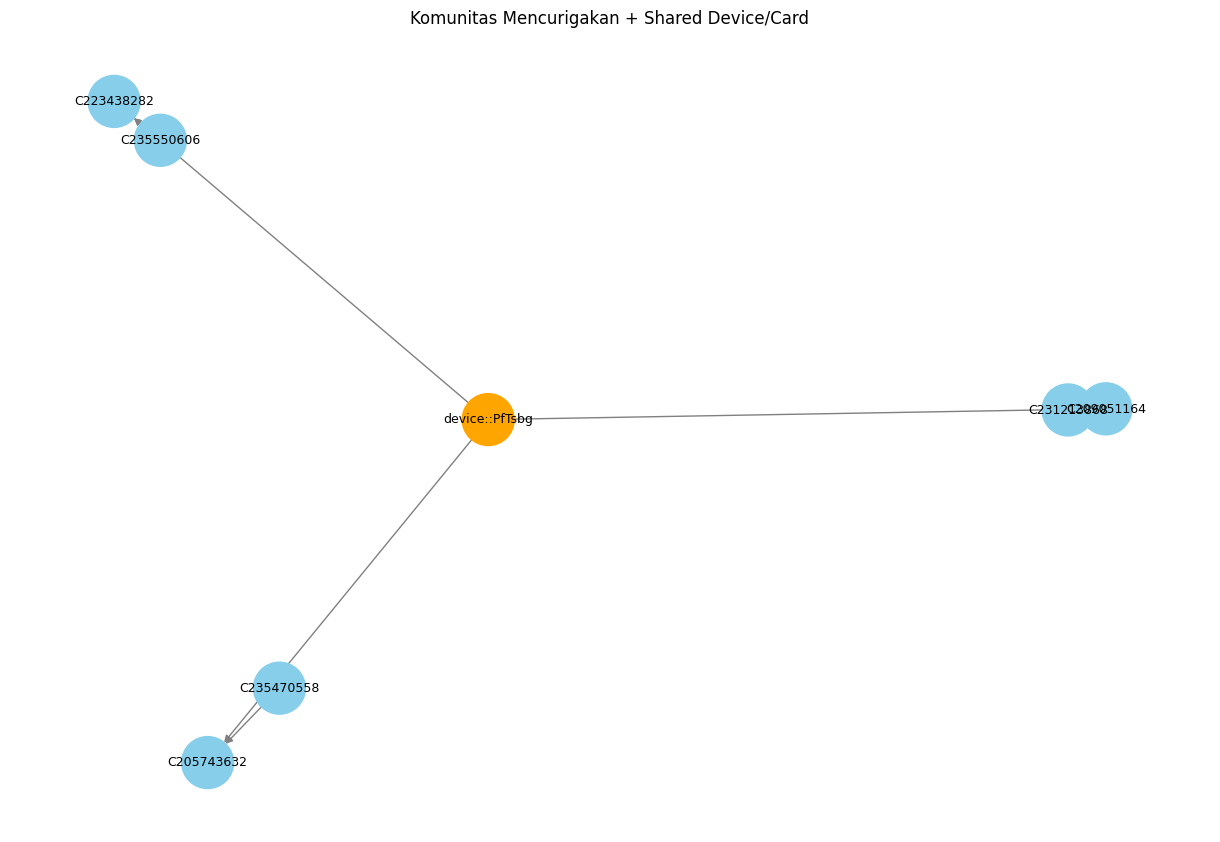

In [56]:
# === Tambahkan Node Device & Card ke Graph ===
for device, users in shared_devices.items():
    dnode = f"device::{device[:6]}"
    G.add_node(dnode, type='device')
    for u in users:
        if u in G:
            G.add_edge(dnode, u, relation='shared_device')

for card, users in shared_card.items():
    cnode = f"card::{card[:8]}"
    G.add_node(cnode, type='card')
    for u in users:
        if u in G:
            G.add_edge(cnode, u, relation='shared_card')

# === Cari Komunitas Kecil dengan Shared Device/Card ===
components = list(nx.weakly_connected_components(G))
sus_comps = []
for comp in components:
    if 3 <= len(comp) <= 10:
        for user in comp:
            preds = list(G.predecessors(user))
            if any(str(p).startswith(("device::", "card::")) for p in preds):
                sus_comps.append(comp)
                break

print(f"Jumlah komunitas mencurigakan: {len(sus_comps)}")

# === Fungsi Visualisasi ===
def visualize_community_with_links(component_nodes):
    sub_nodes = set(component_nodes)
    for node in list(component_nodes):
        for neighbor in G.predecessors(node):
            if str(neighbor).startswith(("device::", "card::")):
                sub_nodes.add(neighbor)

    subgraph = G.subgraph(sub_nodes)
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(subgraph, seed=42)

    colors = []
    for n in subgraph.nodes():
        if str(n).startswith("device::"):
            colors.append('orange')
        elif str(n).startswith("card::"):
            colors.append('green')
        else:
            colors.append('skyblue')

    nx.draw(subgraph, pos, with_labels=True, node_color=colors,
            edge_color='gray', node_size=1400, font_size=9)
    plt.title("Komunitas Mencurigakan + Shared Device/Card")
    plt.show()

# === Visualisasikan Komunitas Pertama (Jika Ada) ===
if sus_comps:
    print("Menampilkan komunitas mencurigakan pertama...")
    visualize_community_with_links(sus_comps[0])
else:
    print("Tidak ada komunitas mencurigakan ditemukan.")